In [2]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
loan_data= pd.read_csv('train-ctrUa4K.csv', index_col=0)
loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [5]:
def num_missing(x):
    return sum(x.isnull())
## per column
print ('missing values per column:')
print(loan_data.apply(num_missing, axis=0))


missing values per column:
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [6]:
import scipy 
from scipy.stats import mode

In [7]:
mode(loan_data['Gender']).mode[0]

'Male'

In [9]:
loan_data['Gender'].fillna(mode(loan_data['Gender']).mode[0], inplace=True)

In [10]:
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean())

Loan_ID
LP001002    146.412162
LP001003    128.000000
LP001005     66.000000
LP001006    120.000000
LP001008    141.000000
               ...    
LP002978     71.000000
LP002979     40.000000
LP002983    253.000000
LP002984    187.000000
LP002990    133.000000
Name: LoanAmount, Length: 614, dtype: float64

In [12]:
loan_data.Gender.value_counts

<bound method IndexOpsMixin.value_counts of Loan_ID
LP001002      Male
LP001003      Male
LP001005      Male
LP001006      Male
LP001008      Male
             ...  
LP002978    Female
LP002979      Male
LP002983      Male
LP002984      Male
LP002990    Female
Name: Gender, Length: 614, dtype: object>

In [13]:
loan_data.Gender.unique

<bound method Series.unique of Loan_ID
LP001002      Male
LP001003      Male
LP001005      Male
LP001006      Male
LP001008      Male
             ...  
LP002978    Female
LP002979      Male
LP002983      Male
LP002984      Male
LP002990    Female
Name: Gender, Length: 614, dtype: object>

In [14]:
def num_missing(x):
    return sum(x.isnull())
## per column
print ('missing values per column:')
print(loan_data.apply(num_missing, axis=0))

missing values per column:
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


<AxesSubplot:xlabel='Loan_ID'>

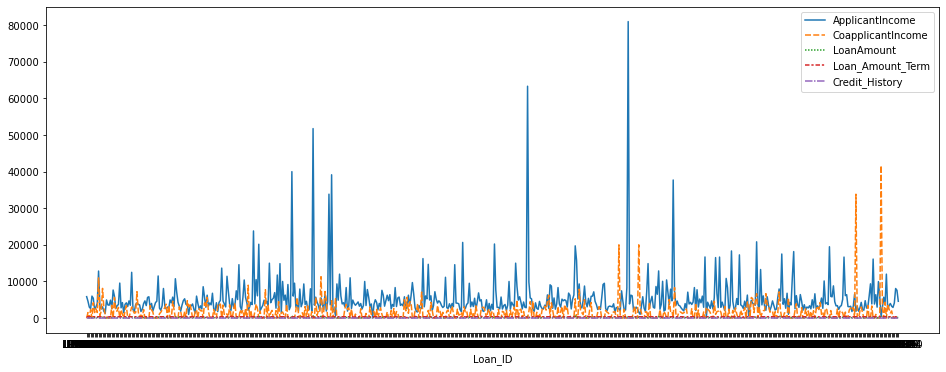

In [15]:
plt.figure(figsize=(16,6))
sns.lineplot(data=loan_data)

<AxesSubplot:title={'center':'Loan Eligibility Status'}, xlabel='Loan_ID', ylabel='ApplicantIncome'>

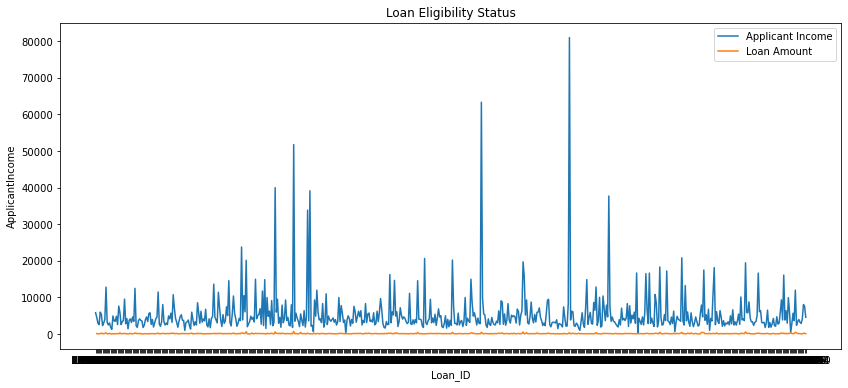

In [26]:
plt.figure(figsize=(14,6))
plt.title('Loan Eligibility Status')
sns.lineplot(data=loan_data['ApplicantIncome'], label='Applicant Income')
sns.lineplot(data=loan_data['LoanAmount'], label='Loan Amount')

## Barcharts and Heatmaps

<AxesSubplot:title={'center':'Loan Eligibility'}, xlabel='Loan_ID', ylabel='ApplicantIncome'>

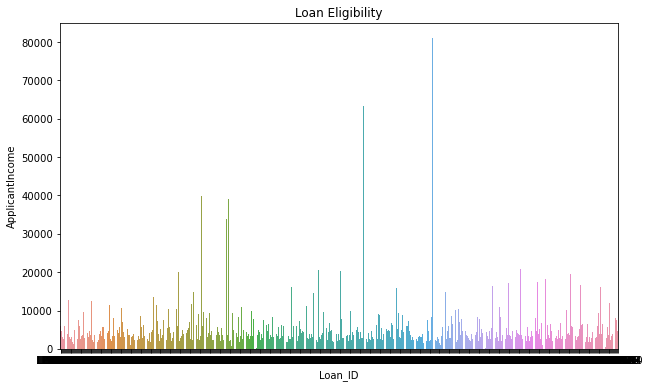

In [29]:
plt.figure(figsize=(10,6))
plt.title('Loan Eligibility')
sns.barplot(x=loan_data.index, y=loan_data['ApplicantIncome'])

IndexError: Inconsistent shape between the condition and the input (got (614, 1) and (614,))

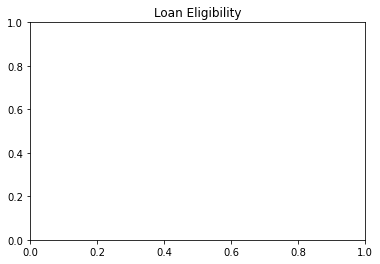

In [35]:

plt.title('Loan Eligibility')
sns.heatmap(data=loan_data.ApplicantIncome, annot=True)
plt.xlabel("Loan_ID")

## Scattered plot

<AxesSubplot:title={'center':'Loan Eligibility'}, xlabel='ApplicantIncome', ylabel='LoanAmount'>

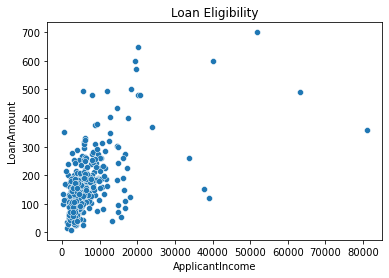

In [36]:
plt.title('Loan Eligibility')
sns.scatterplot(x=loan_data['ApplicantIncome'], y=loan_data['LoanAmount'])

<AxesSubplot:title={'center':'Loan Eligibility'}, xlabel='ApplicantIncome', ylabel='LoanAmount'>

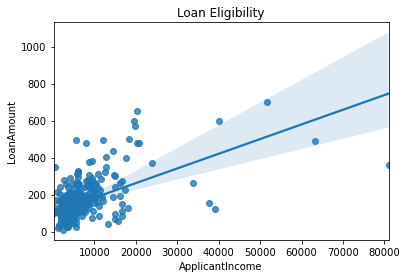

In [37]:
plt.title('Loan Eligibility')
sns.regplot(x=loan_data['ApplicantIncome'], y=loan_data['LoanAmount'])

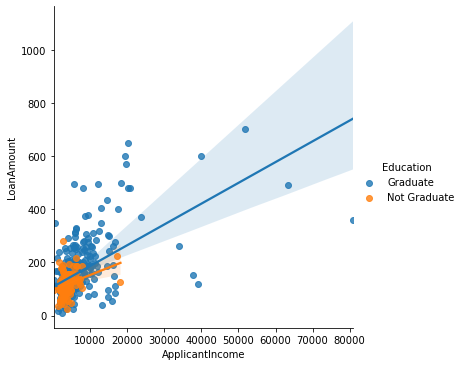

In [40]:

sns.lmplot(x='ApplicantIncome', y='LoanAmount', hue='Education', data=loan_data)

C:\Users\Tossyn\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Tossyn\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Tossyn\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Tossyn\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Tossyn\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.0% of the p

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

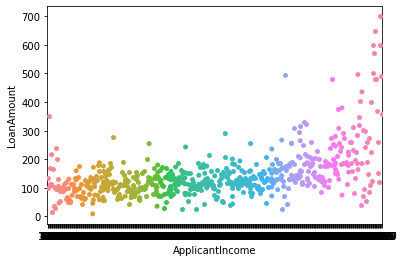

In [43]:
sns.swarmplot(x=loan_data['ApplicantIncome'], y=loan_data['LoanAmount'])

## Histograms

C:\Users\Tossyn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome'>

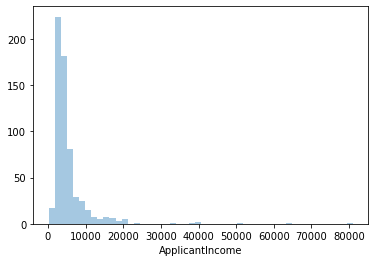

In [44]:
sns.distplot(a=loan_data['ApplicantIncome'], kde=False)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

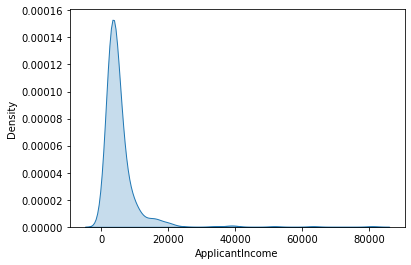

In [45]:
sns.kdeplot(data=loan_data['ApplicantIncome'], shade=True)

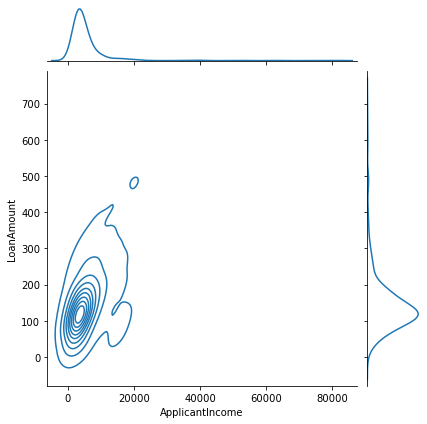

In [48]:
sns.jointplot(x=loan_data['ApplicantIncome'], y=loan_data['LoanAmount'], kind='kde')

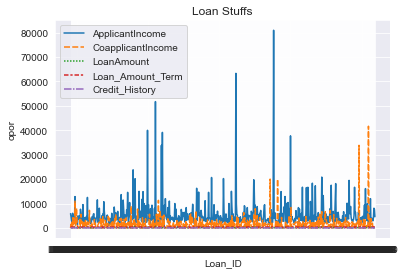

<Figure size 864x432 with 0 Axes>

In [8]:
sns.lineplot(data=loan_data)
plt.title('Loan Stuffs')
plt.ylabel('opor')
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')